Importing Basic python modules for dataset manipulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
# importing dataset
dataset = pd.read_csv('datasets/kc_house_data.csv')

# print top 5 rows with all columns
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check for null values in dataset
print(dataset.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [5]:
# Check for dataset column data types
print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
# Drop unnecessary columns in dataset
dataset = dataset.drop(['id','date'], axis = 1)

# Reprint dataset head after removal of columns
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Sample dataset with 5 columns
data5col = dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']]
data5col_sample = data5col.sample(n=5)

print(data5col_sample)

       sqft_lot  sqft_above     price  sqft_living  bedrooms
10003      7054        3210  690000.0         3210         4
14117      6796        2430  412950.0         2430         4
5358       3253        1800  300000.0         1800         3
16051      7500        1130  315450.0         1130         3
4584      28516        1440  456000.0         1440         3


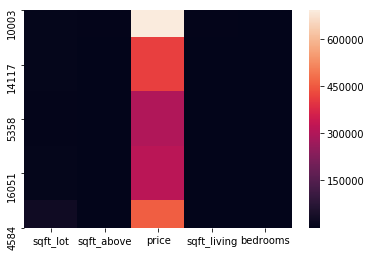

In [8]:
heat_map = sns.heatmap(data5col_sample)
plt.show()

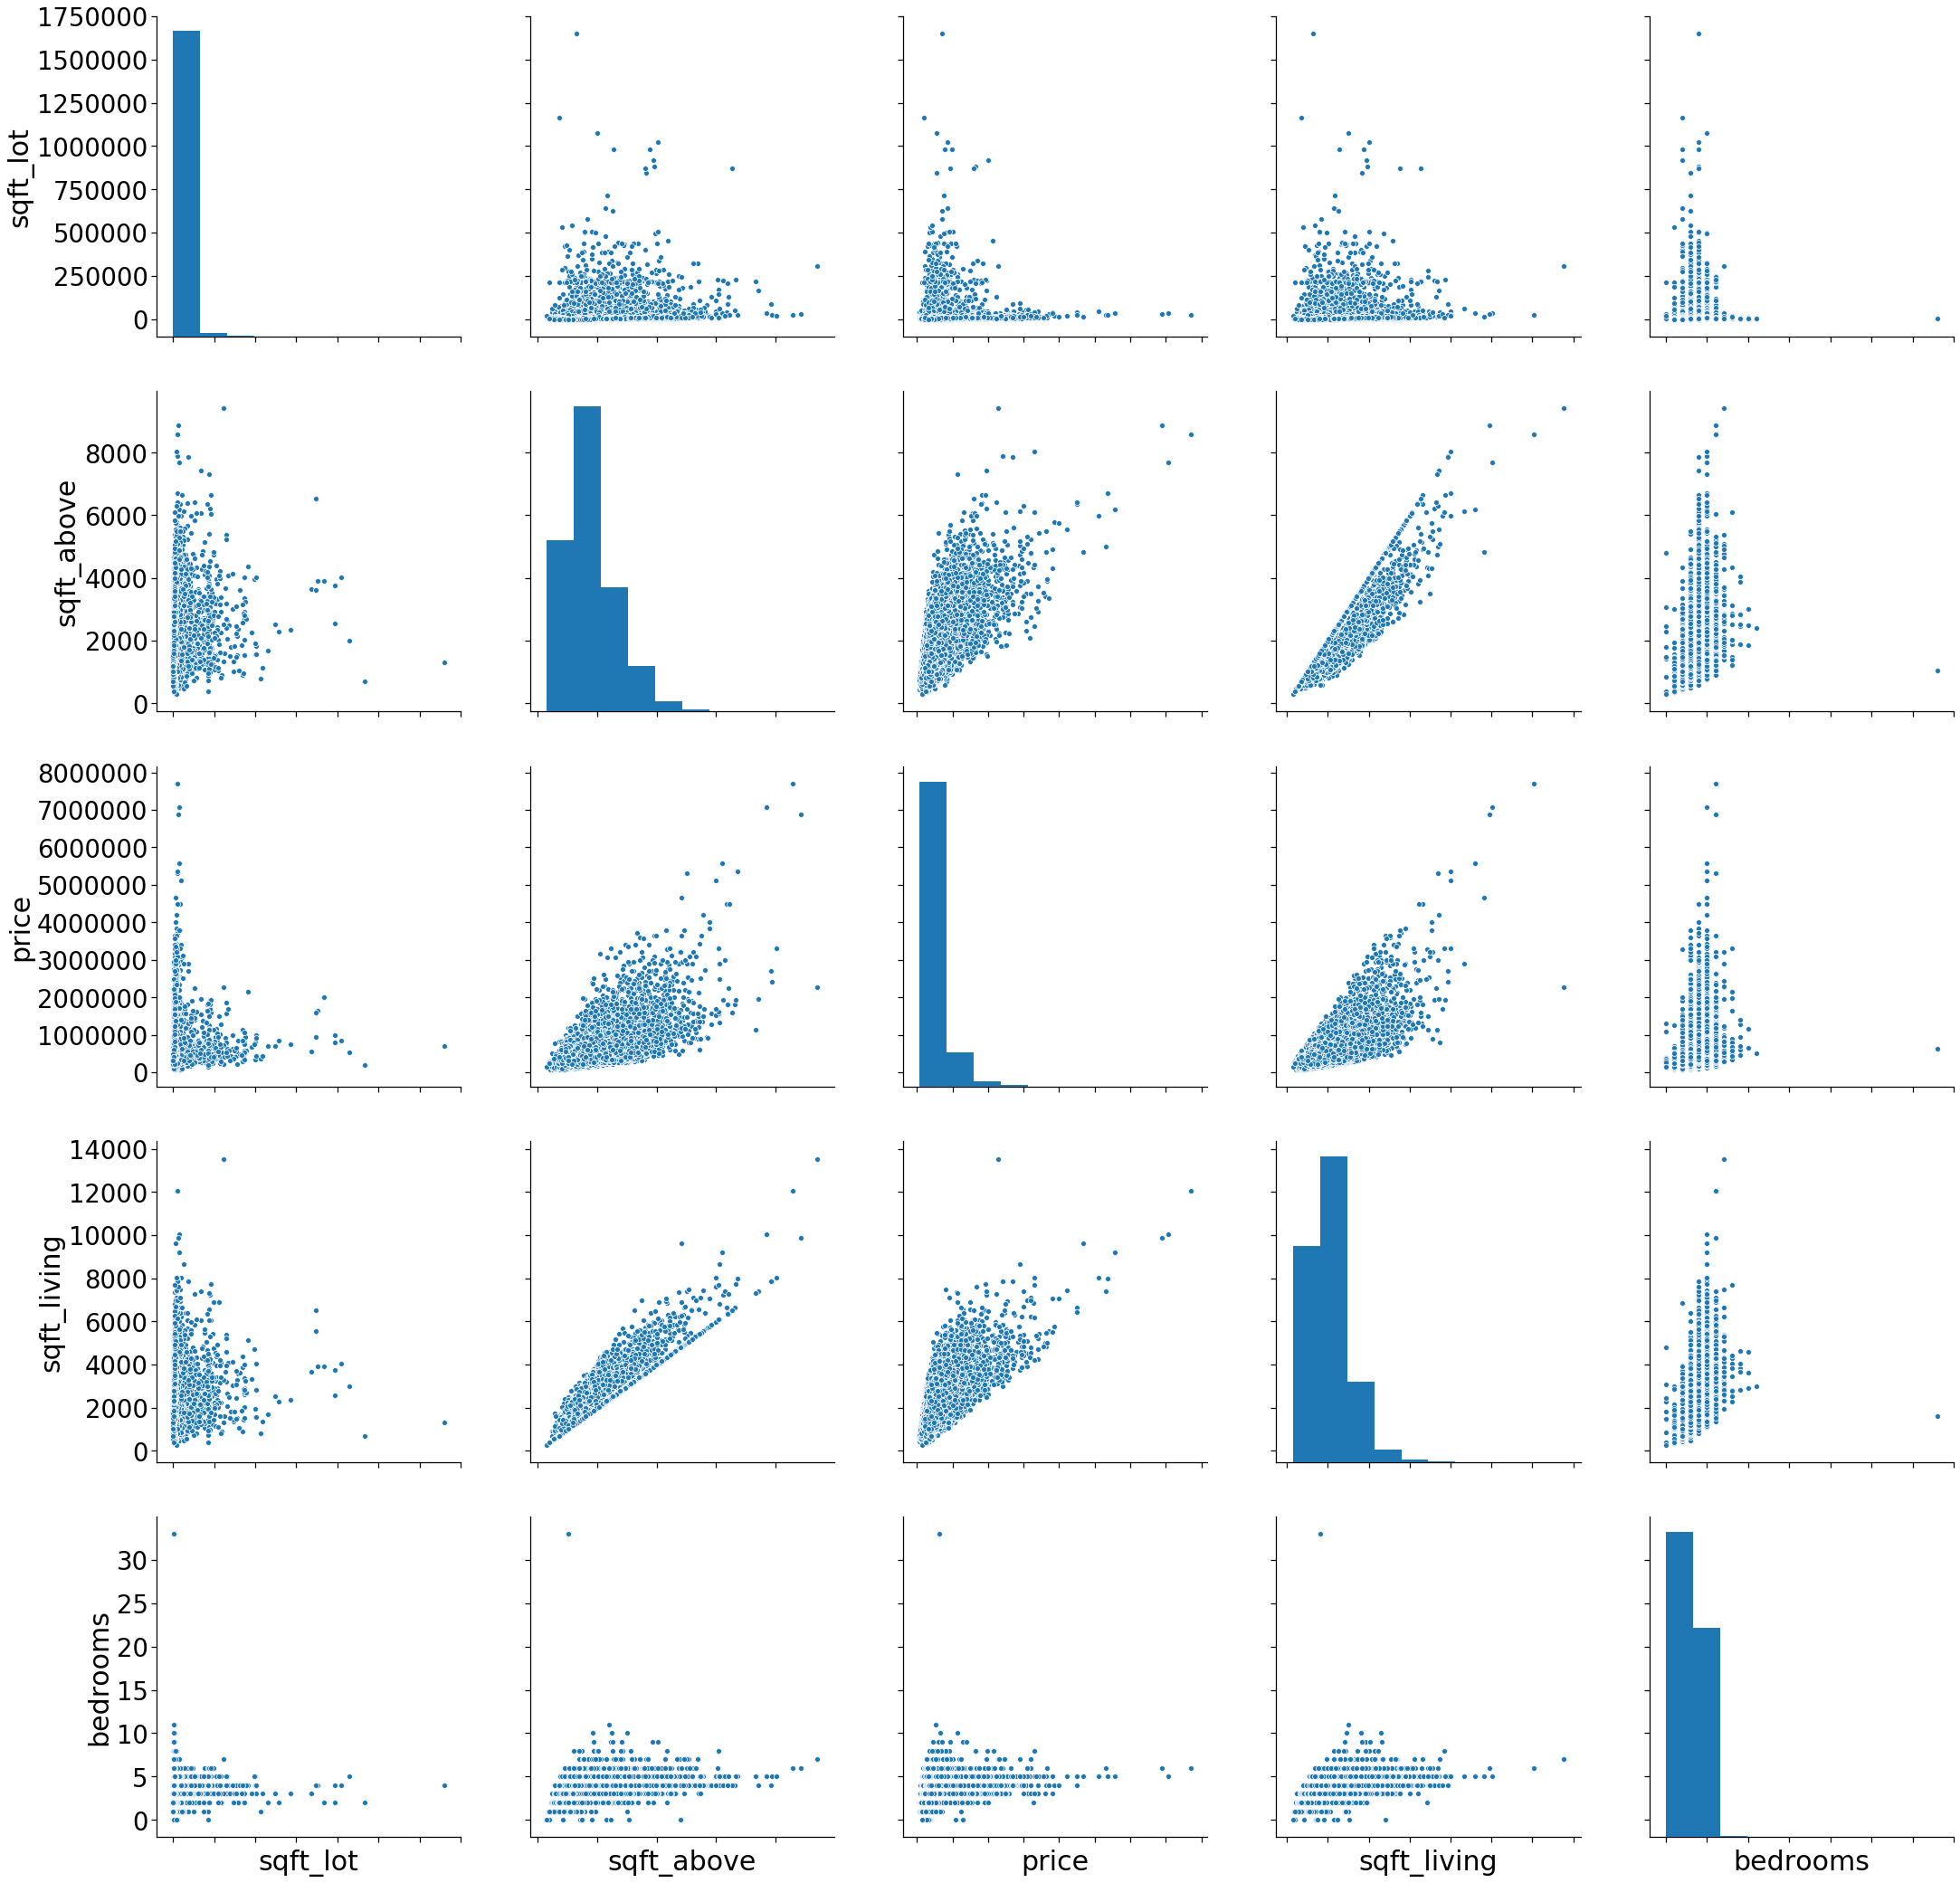

In [9]:
# Understanding dataset with seaborn

with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], height=6, palette='tab20')
g.set(xticklabels=[]);

In [27]:
# Split IDV and DV
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

# Split dataset into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

In [28]:
# Liner Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# print the coefficients
print(regressor.intercept_)
print(regressor.coef_)

314597.67218774115
[-2.89896991e+04  3.62138153e+04  1.00220413e+02  2.60670123e-01
  1.20727307e+04  6.23705375e+05  5.23954366e+04  2.83989522e+04
  9.61484867e+04  6.32485474e+01  3.69718647e+01 -2.53247077e+03
  1.30419682e+01 -5.13069194e+02  6.08417694e+05 -2.07473774e+05
  3.36243161e+01 -4.85344013e-01]


In [31]:
# Predict the Model's Accuracy
y_pred = regressor.predict(X_test)

print(y_pred)
print(y_test)

[ 386540.99847823 1516969.01534071  538662.72575236 ...  526000.75505721
  313924.63663314  400525.67314554]
[ 297000. 1578000.  562100. ...  592500.  284900.  380000.]


In [39]:
# Calculate Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

regressor.score(X_test, y_test)

0.6855578295480387